## Entendimento do Problema

Você foi contratato pela Multiplan (Administradora de Shoppings Centers) como Analista de Dados. 

A sua primeira tarefa é gerar insights que ajudem os administradores a ter uma visão geral sobre os visitantes do shopping, com base na renda e score.

#### Importando Bibliotecas

In [ ]:
#biblioteca para Análise de Dados
import pandas as pd
#biblioteca para Visualisação de Dados
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Importando Dados


In [ ]:
df = pd.read_csv("clientes_shopping - clientes_shopping.csv")

In [ ]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
df.tail(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.rename(columns={"Genre": "Genero", "Age": "Idade", "Annual Income (k$)": "Renda Anual (KR$)", "Spending Score (1-100)": "Score (1-100)"}, inplace = True)

In [ ]:
linhas, colunas = df.shape

In [ ]:
print(linhas)

200


In [ ]:
print(colunas)

5


In [ ]:
print(f"O número de visitantes do shopping conforme disponibilizado é: {linhas}.")

O número de visitantes do shopping conforme disponibilizado é: 200.


#### Informações Estatísticas

In [ ]:
df.describe().round(2)

,CustomerID,Idade,Renda Anual (KR$),Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [ ]:
df.drop(columns={"CustomerID"}, inplace=True)

In [ ]:
df.head()

,Genero,Idade,Renda Anual (KR$),Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Dados Faltantes


In [ ]:
df.head()

,Genero,Idade,Renda Anual (KR$),Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df.isnull().sum()

Genero               0
Idade                0
Renda Anual (KR$)    0
Score (1-100)        0
dtype: int64

#### Duplicatas

In [ ]:
df[df.duplicated()]

,Genero,Idade,Renda Anual (KR$),Score (1-100)


In [ ]:
df.columns

Index(['Genero', 'Idade', 'Renda Anual (KR$)', 'Score (1-100)'], dtype='object')

#### Gênero - Gênero do visitante do shopping

In [ ]:
df.head()

,Genero,Idade,Renda Anual (KR$),Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
df["Genero"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["Genero"] = df["Genero"].replace(["Male"], "Masculino")
df["Genero"] = df["Genero"].replace(["Female"], "Feminino")


In [ ]:
df.head()

,Genero,Idade,Renda Anual (KR$),Score (1-100)
0,Masculino,19,15,39
1,Masculino,21,15,81
2,Feminino,20,16,6
3,Feminino,23,16,77
4,Feminino,31,17,40


In [ ]:
df["Genero"].unique()

array(['Masculino', 'Feminino'], dtype=object)

Desses visitantes, quantos são do gênero masculino e quantos são do gênero feminino?

In [ ]:
df["Genero"].value_counts()

Feminino     112
Masculino     88
Name: Genero, dtype: int64

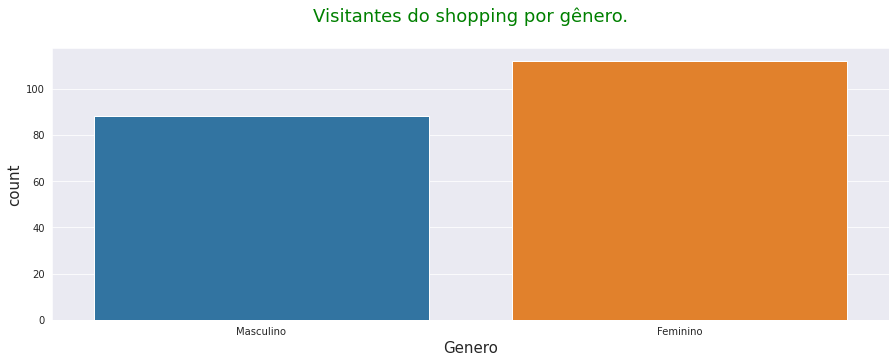

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Visitantes do shopping por gênero.\n", fontsize=18, color="green")
plt.xlabel("Genero", fontsize=15)
plt.ylabel("Contagem de Visitantes", fontsize=15)
sns.countplot(df["Genero"])
plt.show()

Conclusão - Os clientes do sexo feminino são em maior numero em comparação aos clientes do sexo masculino.

####Idade - Idade do Visitante

In [ ]:
df["Idade"].nunique()

51

In [ ]:
df["Idade"].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
df["Idade"].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Idade, dtype: int64

Como a idade se distribui entre os visitantes?

In [ ]:
df["Idade"].describe().round(1)

count    200.0
mean      38.8
std       14.0
min       18.0
25%       28.8
50%       36.0
75%       49.0
max       70.0
Name: Idade, dtype: float64

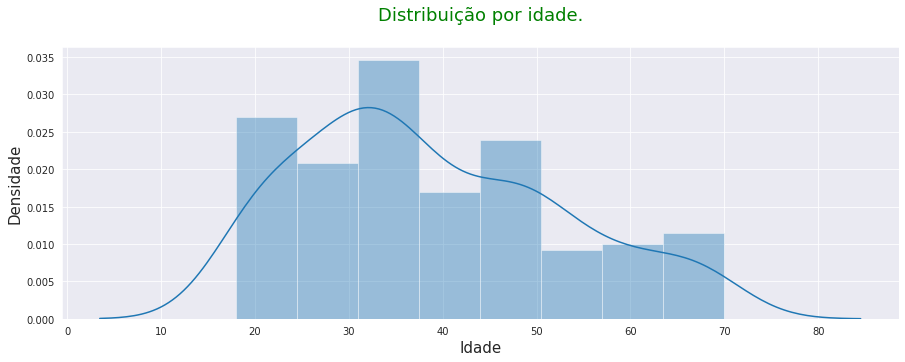

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Distribuição por idade.\n", fontsize=18, color="green")
plt.xlabel("Variação da idade", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Idade"])
plt.show()

Conclusão - Existem clientes de grande variedade de idades.

####Renda - Renda anual

In [ ]:
df["Renda Anual (KR$)"].nunique()

64

In [ ]:
df["Renda Anual (KR$)"].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [ ]:
df["Renda Anual (KR$)"].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Renda Anual (KR$), Length: 64, dtype: int64

Como a renda se distribui entre os visitantes?

In [ ]:
df["Renda Anual (KR$)"].describe().round(1)

count    200.0
mean      60.6
std       26.3
min       15.0
25%       41.5
50%       61.5
75%       78.0
max      137.0
Name: Renda Anual (KR$), dtype: float64

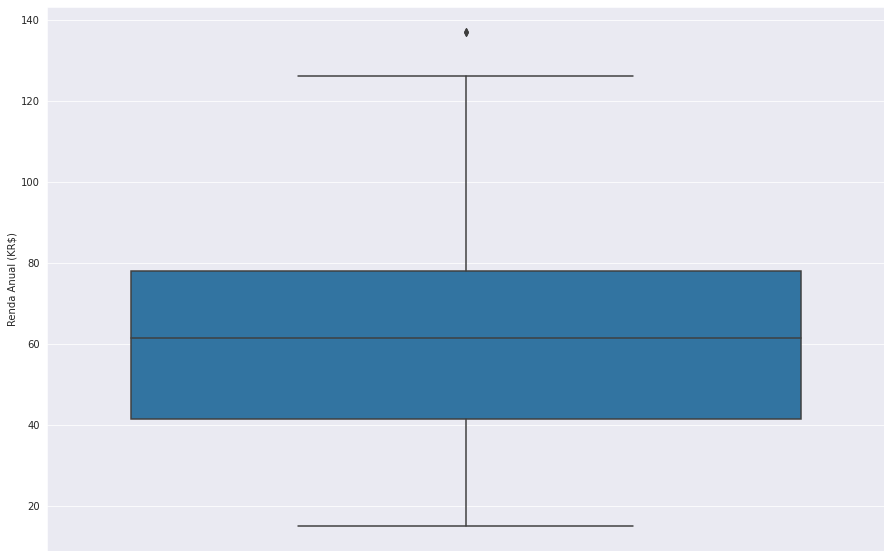

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y="Renda Anual (KR$)")

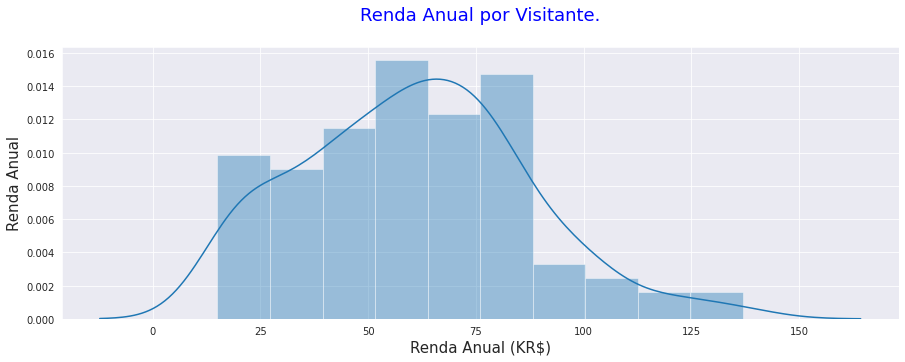

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Renda Anual por Visitante.\n", fontsize=18, color="Blue")
plt.xlabel("Distribuição da renda anual(KR$)", fontsize=15)
plt.ylabel("Renda Anual", fontsize=15)
sns.distplot(df["Renda Anual (KR$)"])
plt.show()

Conclusão - A maior parte da renda anual se concentra entre 50 e 85 anos de idade.

####Score - Score do visitante

In [ ]:
df["Score (1-100)"].nunique()

84

In [ ]:
df["Score (1-100)"].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [ ]:
df["Score (1-100)"].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Score (1-100), Length: 84, dtype: int64

In [ ]:
df["Score (1-100)"].describe().round(1)

count    200.0
mean      50.2
std       25.8
min        1.0
25%       34.8
50%       50.0
75%       73.0
max       99.0
Name: Score (1-100), dtype: float64

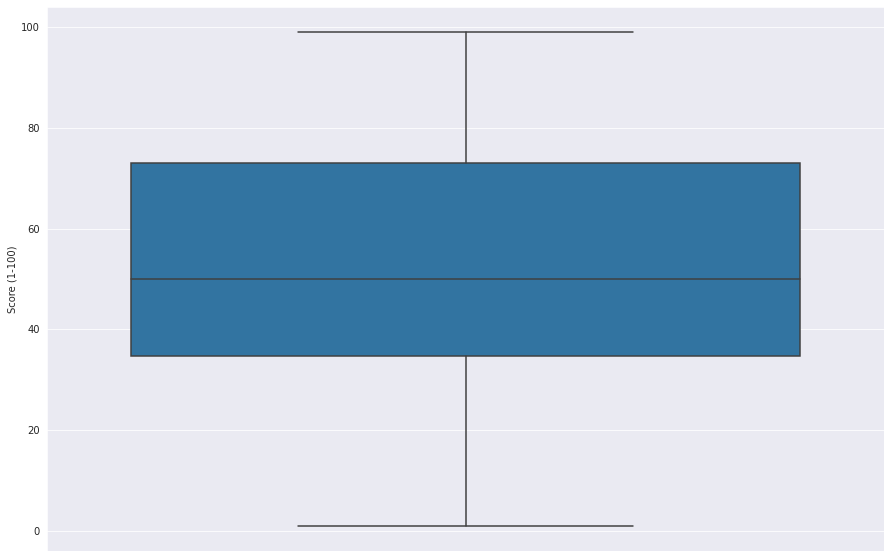

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y="Score (1-100)")

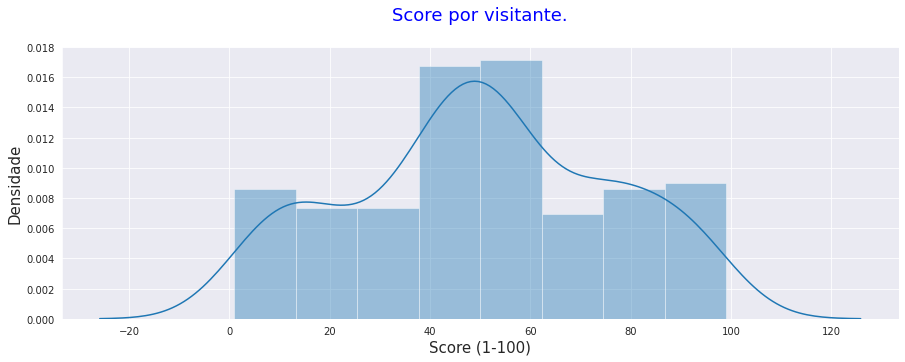

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Score por visitante.\n", fontsize=18, color="Blue")
plt.xlabel("Score (1-100)", fontsize=15)
plt.ylabel("Densidade", fontsize=15)
sns.distplot(df["Score (1-100)"])
plt.show()

Conclusão - A maioria dos clientes obteve o maior scores entre 40 e 60 anos.

##Como as variaveis se relacionam entre si?

In [ ]:
df.corr()

,Idade,Renda Anual (KR$),Score (1-100)
Idade,1.000000,-0.012398,-0.327227
Renda Anual (KR$),-0.012398,1.000000,0.009903
Score (1-100),-0.327227,0.009903,1.000000


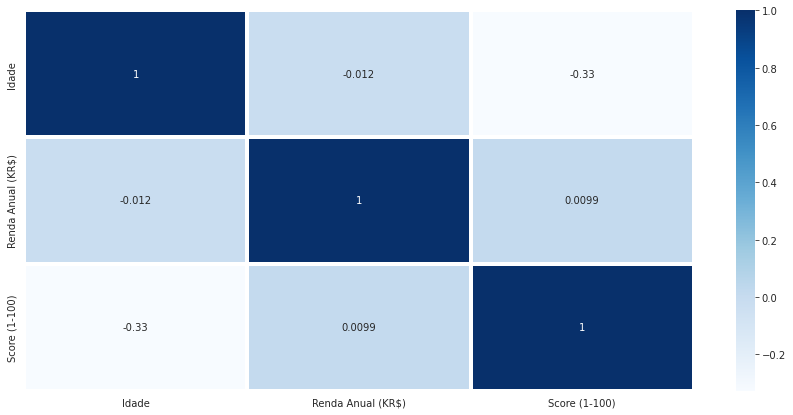

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap="Blues", annot=True, linewidths=3 )

##Como a idade varia em relação ao gênero?

In [ ]:
df.groupby("Genero")["Idade"].mean().round(1)

Genero
Feminino     38.1
Masculino    39.8
Name: Idade, dtype: float64

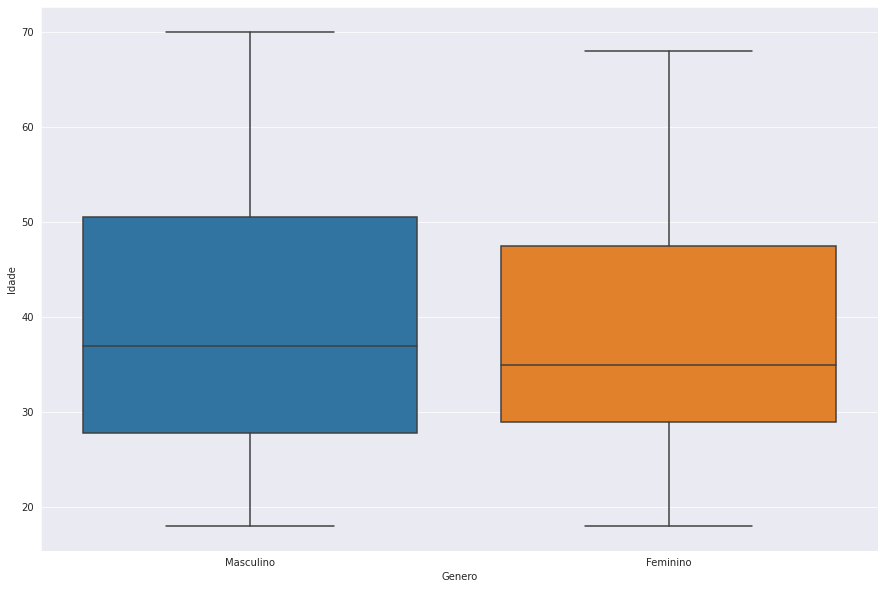

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Genero", y="Idade", data=df)

##Como a renda varia em relação ao genero?

In [ ]:
df.groupby("Genero")["Renda Anual (KR$)"].mean().round(1)

Genero
Feminino     59.2
Masculino    62.2
Name: Renda Anual (KR$), dtype: float64

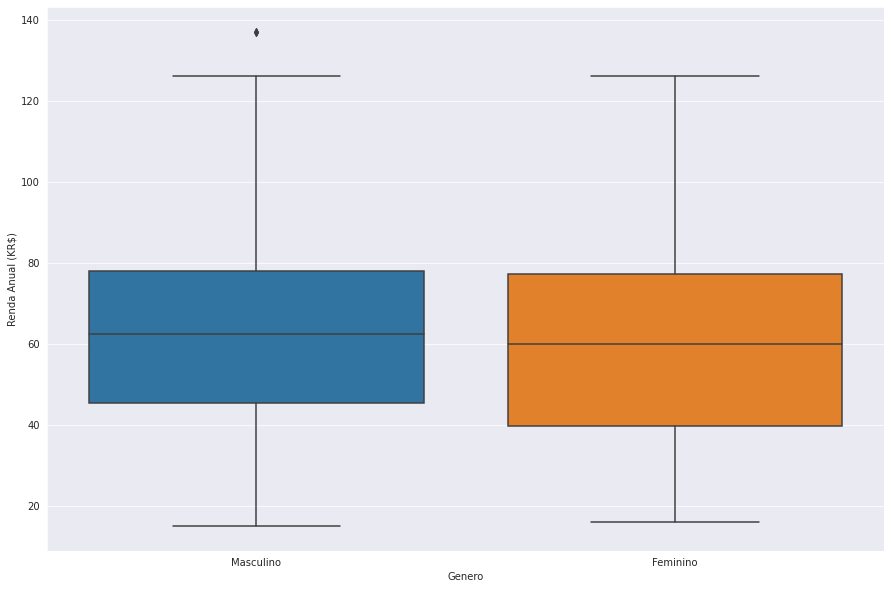

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Genero", y="Renda Anual (KR$)", data=df)

##Como a renda varia em relação a idade?

In [ ]:
df.groupby("Idade")["Renda Anual (KR$)"].mean().round(1)

Idade
18     51.2
19     57.0
20     41.6
21     38.8
22     31.3
23     41.5
24     39.2
25     57.7
26     58.0
27     63.2
28     85.2
29     63.6
30     76.1
31     48.4
32     87.2
33     80.3
34     79.0
35     46.7
36     81.0
37     65.0
38     74.5
39     72.7
40     61.7
41    101.0
42     60.0
43     65.7
44     75.5
45     69.3
46     59.0
47     70.2
48     58.2
49     51.0
50     58.6
51     55.5
52     55.5
53     39.5
54     59.8
55     57.0
56     79.0
57     64.5
58     54.0
59     65.2
60     43.3
63     56.5
64     19.0
65     50.5
66     63.0
67     45.5
68     56.7
69     44.0
70     47.5
Name: Renda Anual (KR$), dtype: float64

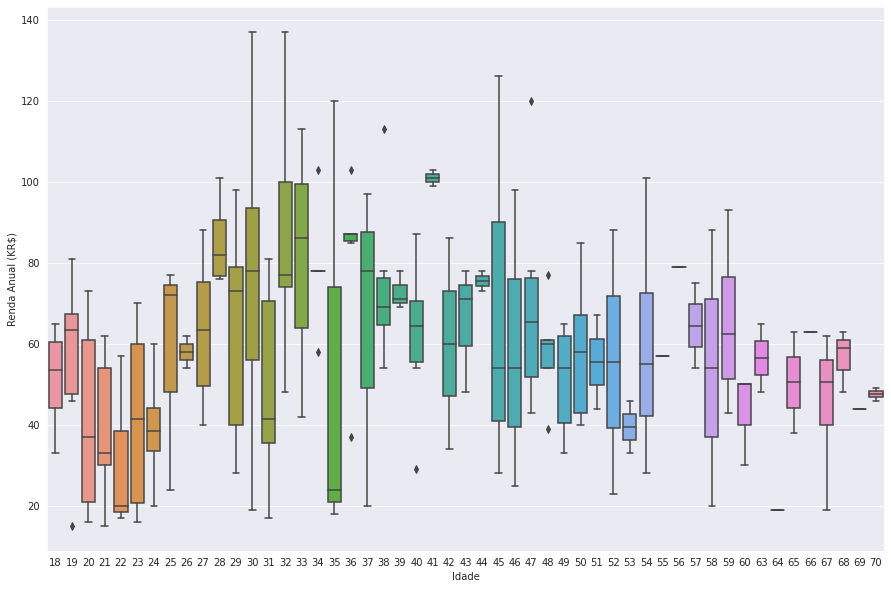

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Idade", y="Renda Anual (KR$)", data=df)